In [17]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt
from Vector_operations_on_data import vector_mean
import tqdm

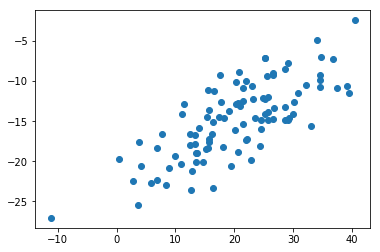

In [10]:
# Dimensionality reduction (PCA)
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

plt.scatter(*zip(*pca_data))

In [11]:
from Vector_operations_on_data import subtract
def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have 0 mean in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]
pca_data = de_mean(pca_data)

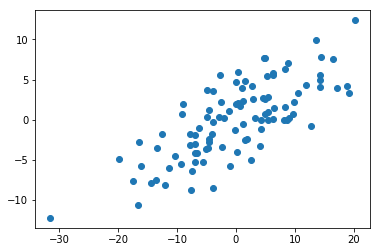

In [12]:
plt.scatter(*zip(*pca_data))

In [18]:
from Vector_operations_on_data import magnitude, dot

def direction(w: Vector) -> Vector:
    """Computes a unit vector"""
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

def directional_variance(data: List[Vector], w: Vector) -> float:
    """Returns the variance of each vector of data matrix
    in the direction of vector w"""
    w_dir = direction(w)
    return [dot(v,w_dir) ** 2 for v in data]

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """The gradient of directional variance w.r.t w"""
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
           for i in range(len(w))]

In [19]:
from gradient_descent import gradient_step;

# Use gradient ascent to find the direction that maximizes data varaince
# gradient ascent will used + step size 
def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random direction
    guess = [1.0 for _ in data[0]]
    
    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv}")
           
    return direction(guess)


dv: [1.5919452889207217, 0.11162039957636091, 36.4025547649421, 11.728489502502454, 6.3054693783325995, 409.1411976464874, 83.82938013669161, 0.5462659150557589, 4.768848492476459, 3.850536813148179, 263.53718173994434, 217.6040428594683, 50.931247036952826, 7.232500531801361, 27.233703089683054, 0.5477907044993009, 0.26388630980894356, 13.507324864098399, 67.78295966206943, 70.13649830855653, 36.833917659713805, 62.81150607293555, 99.42289309223996, 329.6646373521476, 159.02482358322735, 267.28038443536576, 25.2543636846306, 19.704656821177355, 51.08779881606417, 190.25852253860643, 64.99131775830777, 1143.1476522469352, 163.9832972890635, 6.726703383013999, 363.4921548740514, 122.20171442360089, 9.388707436498311, 57.899598294900905, 546.9038273357406, 13.902881092109721, 9.580837565714676, 63.552565331962946, 150.63412511151375, 0.824646397014724, 109.49196159980754, 71.29373158385135, 8.953570007916698, 59.362114009082894, 19.516082109120678, 3.3772730813077505, 1.403973058739719, 

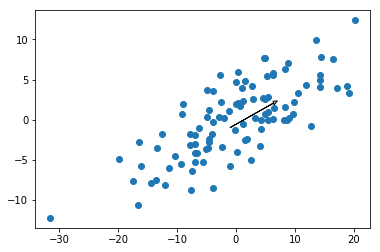

In [20]:
# directional vector of the first principal component
pca1 = first_principal_component(pca_data)

ax = plt.axes()
ax.arrow(-1, -1.0, 8*pca1[0], 8*pca1[1], 
         head_width=0.5, head_length=0.7, 
         fc='lightblue', ec='black')
ax.scatter(*zip(*pca_data))

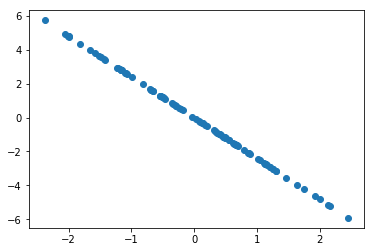

In [21]:
# First prinical component is the projection of v 
from Vector_operations_on_data import scalar_multiply
def project(v: Vector, w: Vector) -> Vector:
    """Return the projection of v onto the direction w"""
    projection_length = dot(v,w)
    return scalar_multiply(projection_length, w)

# For finding other principal components, just remove the projection of 
# previous components from the data matrix
def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the projection from v"""
    return subtract(v,project(v,w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

pr_data = remove_projection(pca_data, pca1)
plt.scatter(*zip(*pr_data))


In [22]:
## Iteratively find multiple principal components from a high-dimensional dataset
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)
    return components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v,w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]